## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  90.941004   986.964838  0.838555  2.667826  1.479841
1   4.698206  1230.865513  0.356794  2.518305  1.333610
2  89.434093   268.143892  0.316003  3.479379  0.610540
3  91.786901  1056.535566  0.211409  5.265783  1.209380
4  86.780625  1681.903997  0.141751  9.790311  0.974973


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0648250	total: 68.7ms	remaining: 1m 8s
1:	learn: 1.0536584	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0428084	total: 69.8ms	remaining: 23.2s
3:	learn: 1.0323055	total: 70.5ms	remaining: 17.6s
4:	learn: 1.0213363	total: 71.1ms	remaining: 14.1s
5:	learn: 1.0128634	total: 71.6ms	remaining: 11.9s
6:	learn: 1.0033388	total: 72ms	remaining: 10.2s
7:	learn: 0.9929278	total: 72.5ms	remaining: 8.99s
8:	learn: 0.9822754	total: 72.9ms	remaining: 8.03s
9:	learn: 0.9705811	total: 73.4ms	remaining: 7.27s
10:	learn: 0.9618402	total: 73.9ms	remaining: 6.64s
11:	learn: 0.9527068	total: 74.4ms	remaining: 6.12s
12:	learn: 0.9454918	total: 74.8ms	remaining: 5.68s
13:	learn: 0.9338214	total: 75.3ms	remaining: 5.3s
14:	learn: 0.9237239	total: 75.8ms	remaining: 4.98s
15:	learn: 0.9168152	total: 76.2ms	remaining: 4.69s
16:	learn: 0.9070618	total: 76.7ms	remaining: 4.43s
17:	learn: 0.8997830	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8899739	total: 77.5ms	remaining: 4

88:	learn: 0.4872416	total: 109ms	remaining: 1.11s
89:	learn: 0.4838203	total: 109ms	remaining: 1.1s
90:	learn: 0.4806761	total: 110ms	remaining: 1.1s
91:	learn: 0.4777935	total: 110ms	remaining: 1.09s
92:	learn: 0.4749979	total: 111ms	remaining: 1.08s
93:	learn: 0.4711904	total: 111ms	remaining: 1.07s
94:	learn: 0.4658233	total: 111ms	remaining: 1.06s
95:	learn: 0.4628185	total: 112ms	remaining: 1.05s
96:	learn: 0.4592611	total: 112ms	remaining: 1.04s
97:	learn: 0.4558604	total: 112ms	remaining: 1.03s
98:	learn: 0.4529223	total: 113ms	remaining: 1.03s
99:	learn: 0.4491229	total: 113ms	remaining: 1.02s
100:	learn: 0.4456770	total: 114ms	remaining: 1.01s
101:	learn: 0.4427798	total: 114ms	remaining: 1s
102:	learn: 0.4395840	total: 114ms	remaining: 996ms
103:	learn: 0.4365407	total: 115ms	remaining: 988ms
104:	learn: 0.4339688	total: 115ms	remaining: 981ms
105:	learn: 0.4309523	total: 115ms	remaining: 974ms
106:	learn: 0.4272384	total: 116ms	remaining: 967ms
107:	learn: 0.4239436	total: 

263:	learn: 0.1893114	total: 185ms	remaining: 516ms
264:	learn: 0.1890587	total: 186ms	remaining: 516ms
265:	learn: 0.1877950	total: 186ms	remaining: 515ms
266:	learn: 0.1874581	total: 187ms	remaining: 513ms
267:	learn: 0.1871380	total: 187ms	remaining: 511ms
268:	learn: 0.1868179	total: 187ms	remaining: 509ms
269:	learn: 0.1863693	total: 188ms	remaining: 508ms
270:	learn: 0.1858761	total: 188ms	remaining: 507ms
271:	learn: 0.1848625	total: 189ms	remaining: 505ms
272:	learn: 0.1845260	total: 189ms	remaining: 503ms
273:	learn: 0.1837678	total: 189ms	remaining: 502ms
274:	learn: 0.1834111	total: 190ms	remaining: 500ms
275:	learn: 0.1823500	total: 190ms	remaining: 499ms
276:	learn: 0.1819999	total: 191ms	remaining: 498ms
277:	learn: 0.1814048	total: 191ms	remaining: 496ms
278:	learn: 0.1810411	total: 191ms	remaining: 495ms
279:	learn: 0.1803420	total: 192ms	remaining: 494ms
280:	learn: 0.1801353	total: 192ms	remaining: 492ms
281:	learn: 0.1798330	total: 193ms	remaining: 491ms
282:	learn: 

505:	learn: 0.0868629	total: 290ms	remaining: 283ms
506:	learn: 0.0864538	total: 290ms	remaining: 282ms
507:	learn: 0.0861495	total: 291ms	remaining: 281ms
508:	learn: 0.0858514	total: 291ms	remaining: 281ms
509:	learn: 0.0856615	total: 291ms	remaining: 280ms
510:	learn: 0.0852901	total: 292ms	remaining: 279ms
511:	learn: 0.0848928	total: 292ms	remaining: 278ms
512:	learn: 0.0845987	total: 293ms	remaining: 278ms
513:	learn: 0.0843107	total: 293ms	remaining: 277ms
514:	learn: 0.0841268	total: 294ms	remaining: 276ms
515:	learn: 0.0839466	total: 294ms	remaining: 276ms
516:	learn: 0.0836661	total: 294ms	remaining: 275ms
517:	learn: 0.0834901	total: 295ms	remaining: 274ms
518:	learn: 0.0833510	total: 295ms	remaining: 274ms
519:	learn: 0.0830777	total: 296ms	remaining: 273ms
520:	learn: 0.0829642	total: 296ms	remaining: 272ms
521:	learn: 0.0828209	total: 297ms	remaining: 272ms
522:	learn: 0.0824386	total: 297ms	remaining: 271ms
523:	learn: 0.0820633	total: 297ms	remaining: 270ms
524:	learn: 

688:	learn: 0.0538650	total: 367ms	remaining: 166ms
689:	learn: 0.0536776	total: 367ms	remaining: 165ms
690:	learn: 0.0534915	total: 368ms	remaining: 164ms
691:	learn: 0.0533301	total: 368ms	remaining: 164ms
692:	learn: 0.0531712	total: 369ms	remaining: 163ms
693:	learn: 0.0529878	total: 369ms	remaining: 163ms
694:	learn: 0.0528002	total: 369ms	remaining: 162ms
695:	learn: 0.0526267	total: 370ms	remaining: 162ms
696:	learn: 0.0525578	total: 370ms	remaining: 161ms
697:	learn: 0.0524808	total: 371ms	remaining: 160ms
698:	learn: 0.0523015	total: 371ms	remaining: 160ms
699:	learn: 0.0521383	total: 372ms	remaining: 159ms
700:	learn: 0.0520638	total: 372ms	remaining: 159ms
701:	learn: 0.0518021	total: 373ms	remaining: 158ms
702:	learn: 0.0517287	total: 373ms	remaining: 158ms
703:	learn: 0.0515529	total: 374ms	remaining: 157ms
704:	learn: 0.0513908	total: 374ms	remaining: 157ms
705:	learn: 0.0511350	total: 375ms	remaining: 156ms
706:	learn: 0.0509774	total: 375ms	remaining: 155ms
707:	learn: 

922:	learn: 0.0265015	total: 471ms	remaining: 39.3ms
923:	learn: 0.0264412	total: 472ms	remaining: 38.8ms
924:	learn: 0.0264008	total: 472ms	remaining: 38.3ms
925:	learn: 0.0263631	total: 473ms	remaining: 37.8ms
926:	learn: 0.0262887	total: 473ms	remaining: 37.2ms
927:	learn: 0.0262517	total: 473ms	remaining: 36.7ms
928:	learn: 0.0262289	total: 474ms	remaining: 36.2ms
929:	learn: 0.0261574	total: 474ms	remaining: 35.7ms
930:	learn: 0.0260978	total: 474ms	remaining: 35.1ms
931:	learn: 0.0259760	total: 475ms	remaining: 34.6ms
932:	learn: 0.0259172	total: 475ms	remaining: 34.1ms
933:	learn: 0.0258748	total: 475ms	remaining: 33.6ms
934:	learn: 0.0258174	total: 476ms	remaining: 33.1ms
935:	learn: 0.0257599	total: 476ms	remaining: 32.6ms
936:	learn: 0.0256595	total: 477ms	remaining: 32ms
937:	learn: 0.0256377	total: 477ms	remaining: 31.5ms
938:	learn: 0.0255686	total: 477ms	remaining: 31ms
939:	learn: 0.0255276	total: 478ms	remaining: 30.5ms
940:	learn: 0.0254716	total: 478ms	remaining: 30ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

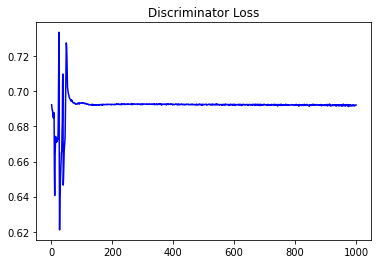

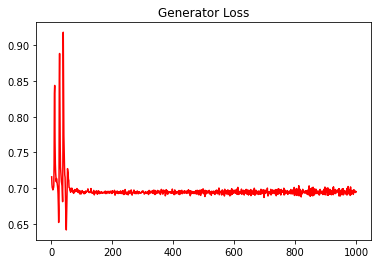

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1635931479507961


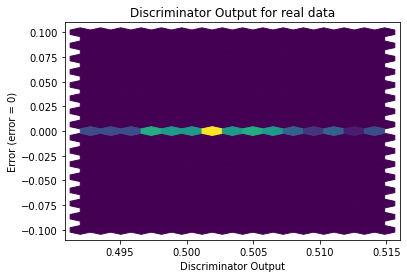

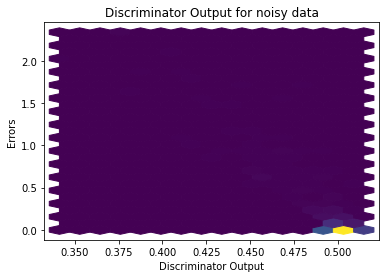

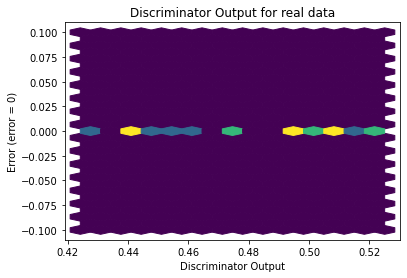

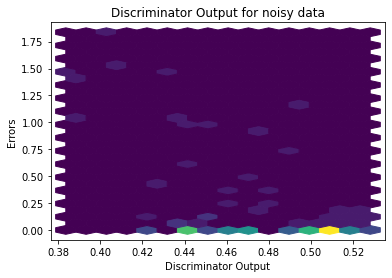

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


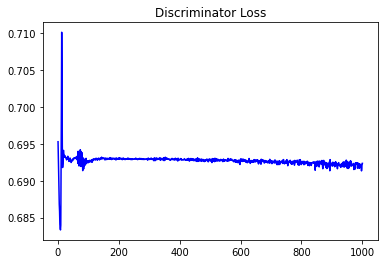

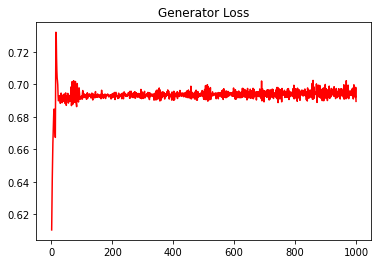

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1848491584038411


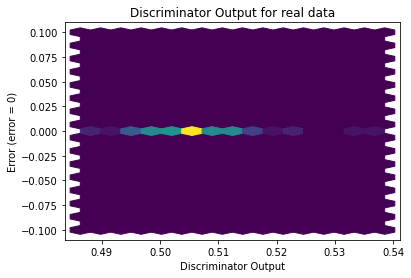

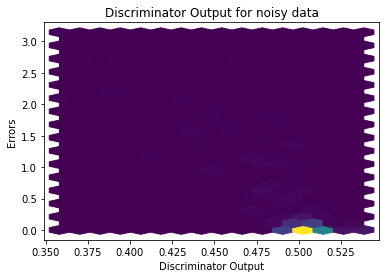

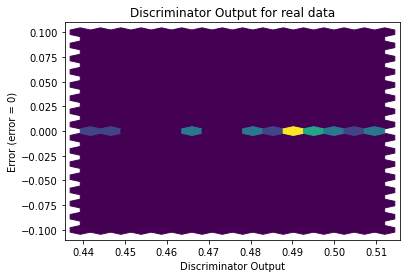

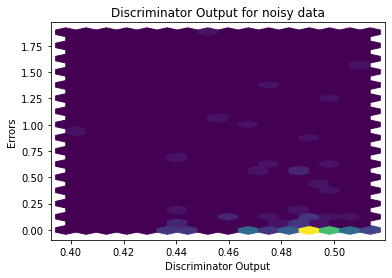

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5401]], requires_grad=True)
